In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Import dataset
dataset = pd.read_csv('train.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [46]:
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# EDA

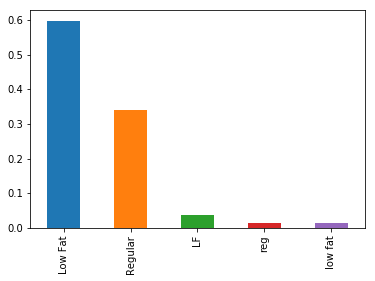

In [47]:
dataset['Item_Fat_Content'].value_counts(normalize = True).plot(kind = 'bar')

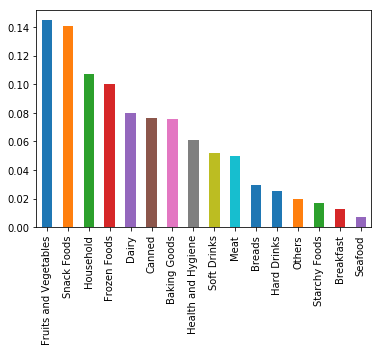

In [48]:
dataset['Item_Type'].value_counts(normalize = True).plot(kind = 'bar')

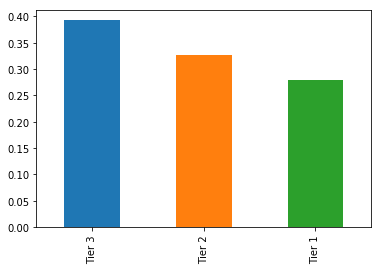

In [49]:
dataset['Outlet_Location_Type'].value_counts(normalize = True).plot(kind = 'bar')

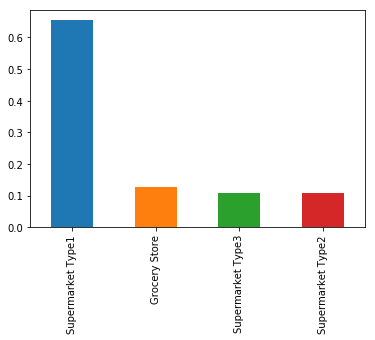

In [50]:
dataset['Outlet_Type'].value_counts(normalize = True).plot(kind = 'bar')

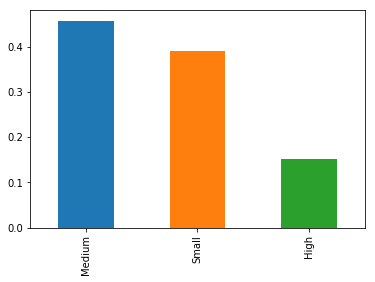

In [51]:
dataset['Outlet_Size'].value_counts(normalize = True).plot(kind = 'bar')

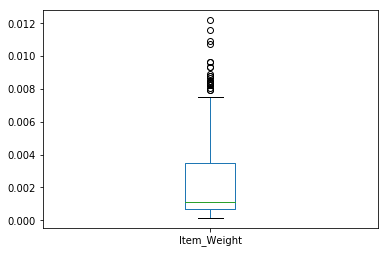

In [52]:
dataset['Item_Weight'].value_counts(normalize = True).plot(kind = 'box')

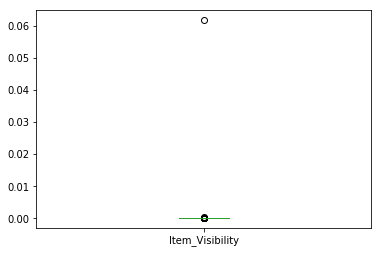

In [53]:
dataset['Item_Visibility'].value_counts(normalize = True).plot(kind = 'box')

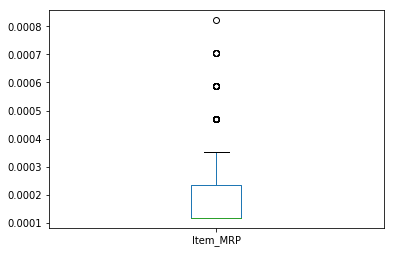

In [54]:
dataset['Item_MRP'].value_counts(normalize = True).plot(kind = 'box')

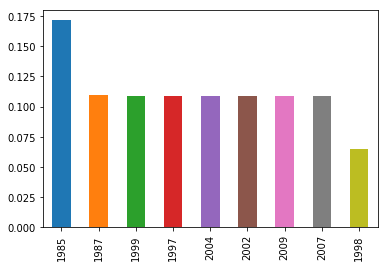

In [55]:
dataset['Outlet_Establishment_Year'].value_counts(normalize = True).plot(kind = 'bar')

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


# Pre Processing 

In [57]:
# Dropping unnecesary columns
dataset.pop('Item_Identifier')
dataset.pop('Outlet_Identifier')

# Missing Value Treatment
# dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(),inplace = True)
dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0],inplace = True)

# imputing item_weight depending upon mean of particular item's weight
dict_m = {}
for i in dataset['Item_Type'].unique():
    dict_m[i] = dataset[dataset['Item_Type'] == i]['Item_Weight'].mean()
    
    
import math
n = []
for index, row in dataset.iterrows():
    wt = row['Item_Weight']
    if math.isnan(row['Item_Weight']):
        wt = dict_m[row['Item_Type']]
    n.append(wt)    

dataset['Item_Weight'] = n

In [58]:
# Outliers Treatment
dataset['Item_Weight'] = np.log(dataset['Item_Weight']*10 + 1)
dataset['Item_Visibility'] = np.log(dataset['Item_Visibility']*10 + 1)
dataset['Item_MRP'] = np.log(dataset['Item_MRP']*10 + 1)

In [59]:
# One hot encoding categorical features
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].map({'Low Fat':1,'LF':1,'low fat':1,'Regular':0,'reg':0})

temp = pd.get_dummies(dataset['Item_Type'],drop_first=True)
dataset.drop(['Item_Type'],axis=1,inplace=True )
dataset = pd.concat([temp,dataset],axis=1)

temp = pd.get_dummies(dataset['Outlet_Size'],drop_first=True)
dataset.drop(['Outlet_Size'],axis=1,inplace=True )
dataset = pd.concat([temp,dataset],axis=1)

temp = pd.get_dummies(dataset['Outlet_Type'],drop_first=True)
dataset.drop(['Outlet_Type'],axis=1,inplace=True )
dataset = pd.concat([temp,dataset],axis=1)

temp = pd.get_dummies(dataset['Outlet_Location_Type'],drop_first=True)
dataset.drop(['Outlet_Location_Type'],axis=1,inplace=True )
dataset = pd.concat([temp,dataset],axis=1)

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
Tier 2                       8523 non-null uint8
Tier 3                       8523 non-null uint8
Supermarket Type1            8523 non-null uint8
Supermarket Type2            8523 non-null uint8
Supermarket Type3            8523 non-null uint8
Medium                       8523 non-null uint8
Small                        8523 non-null uint8
Breads                       8523 non-null uint8
Breakfast                    8523 non-null uint8
Canned                       8523 non-null uint8
Dairy                        8523 non-null uint8
Frozen Foods                 8523 non-null uint8
Fruits and Vegetables        8523 non-null uint8
Hard Drinks                  8523 non-null uint8
Health and Hygiene           8523 non-null uint8
Household                    8523 non-null uint8
Meat                         8523 non-null uint8
Others                       8523 non-null uint8
Seafood    

In [61]:
# Correlation Matrix
corr = dataset.corr()
corr

,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Medium,Small,Breads,Breakfast,Canned,...,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Tier 2,1.000000,-0.560639,0.506347,-0.243524,-0.244554,0.079437,0.083381,0.002933,-0.008741,0.009366,...,0.003150,0.006390,0.013034,0.008884,-0.036299,0.003272,-0.057884,0.002544,0.540820,0.058261
Tier 3,-0.560639,1.000000,-0.636465,0.434369,0.436205,0.183714,-0.502066,0.001909,0.003754,-0.004612,...,-0.005998,-0.004603,-0.007461,0.001523,0.026062,-0.000241,0.008084,-0.002219,-0.333895,0.046376
Supermarket Type1,0.506347,-0.636465,1.000000,-0.480943,-0.482977,-0.313450,0.163388,-0.006189,-0.008695,0.001236,...,-0.005367,-0.000154,0.009777,0.013516,-0.048833,-0.000533,-0.123378,0.005065,0.245070,0.108765
Supermarket Type2,-0.243524,0.434369,-0.480943,1.000000,-0.122702,0.279224,-0.218082,-0.000734,0.000077,0.010418,...,0.000138,0.001453,-0.004153,0.002553,-0.011669,-0.002129,-0.030776,0.002876,0.466336,-0.038059
Supermarket Type3,-0.244554,0.436205,-0.482977,-0.122702,1.000000,0.280404,-0.219004,0.007693,-0.003550,0.001136,...,-0.000091,0.005782,-0.006443,-0.006427,0.056845,-0.000183,-0.045694,-0.006250,-0.538072,0.311192
Medium,0.079437,0.183714,-0.313450,0.279224,0.280404,1.000000,-0.781030,0.002523,-0.000322,-0.001082,...,-0.000195,0.005147,-0.001793,0.001199,-0.002708,-0.003495,-0.026374,-0.010556,0.342251,0.075154
Small,0.083381,-0.502066,0.163388,-0.218082,-0.219004,-0.781030,1.000000,0.001042,-0.001898,0.007054,...,0.006259,-0.000916,0.001549,-0.006934,0.003222,0.002313,0.054326,0.010365,-0.056567,-0.098403
Breads,0.002933,0.001909,-0.006189,-0.000734,0.007693,0.002523,0.001042,1.000000,-0.019918,-0.050010,...,-0.015152,-0.070514,-0.040885,-0.023156,-0.064069,-0.032643,0.002875,-0.000680,-0.003631,0.002332
Breakfast,-0.008741,0.003754,-0.008695,0.000077,-0.003550,-0.000322,-0.001898,-0.019918,1.000000,-0.032828,...,-0.009946,-0.046288,-0.026838,-0.015201,-0.003146,-0.065711,0.046679,0.003287,-0.006768,-0.004656
Canned,0.009366,-0.004612,0.001236,0.010418,0.001136,-0.001082,0.007054,-0.050010,-0.032828,1.000000,...,-0.024972,-0.116217,-0.067383,-0.038165,-0.036755,-0.073235,0.008926,0.002302,0.010998,0.007387


In [62]:
X = dataset.drop(columns=['Item_Outlet_Sales'])
y = dataset['Item_Outlet_Sales']

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model Training And Selection

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 1155.6545958423999


In [65]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 1096.9013144582489


In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 1137.7343481938176


In [67]:
# Principle Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

var = pca.explained_variance_ratio_*100
var.sum()

97.87454756443526

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()

regressor.fit(pca_train, y_train)
y_pred = regressor.predict(pca_test)

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 1090.6566040991238


# Parameter Tuning

In [69]:
# Tuning Boosting Parameters  Only
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV
params = {"loss" : ['ls','huber'],
          "learning_rate":[0.1,0.05,0.2],
          "subsample" : [1,0.8],
          "criterion" : ["mse","friedman_mse"],
          "alpha" : [0.9,0.8,0.7]
          }
reg = GridSearchCV(regressor, params, n_jobs=-1, cv=5, verbose=1, scoring='neg_mean_squared_error')
reg.fit(x_train, y_train)

reg.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.7min finished


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                      learning_rate=0.1, loss='huber',subsample=0.8)

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 1098.9833516817516


In [71]:
# Tuning Tree Parameters Only
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV
params = {"n_estimators":[100,150,80],
          "max_depth" : np.arange(3,7),
          "min_samples_leaf" : np.arange(1,4),
          "min_samples_split" : np.arange(2,6)
          }
reg = GridSearchCV(regressor, params, n_jobs=-1, cv=5, verbose=1, scoring='neg_mean_squared_error')
reg.fit(x_train, y_train)

reg.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  5.5min finished


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=80, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(min_samples_leaf=1,min_samples_split=5,
                                      n_estimators=80,max_depth=3)

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 1096.2754037560387


In [73]:
# Tuning tree parameters after tuning boosting parameters
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                                      learning_rate=0.05, loss='ls',subsample=1)
from sklearn.model_selection import GridSearchCV
params = {"n_estimators":[100,150,200,80],
          "max_depth" : np.arange(3,6),
          "min_samples_leaf" : np.arange(1,4),
          "min_samples_split" : np.arange(2,6)
          }
reg = GridSearchCV(regressor, params, n_jobs=-1, cv=5, verbose=1, scoring='neg_mean_squared_error')
reg.fit(x_train, y_train)

reg.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  5.8min finished


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 1096.7761093518411


# Thank You